# Bonus: Temperature Analysis I

In [1]:
import pandas as pd
from datetime import datetime as dt
import scipy.stats as stats

In [2]:
# "tobs" is "temperature observations"
df = pd.read_csv("Resources/hawaii_measurements.csv")
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [3]:
# Convert the date column format from string to datetime
df['date']=  pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [4]:
# Set the date column as the DataFrame index
# Note: by using date, non-unique values. Pandas supposed to allow non-unique values, performance slower.
# The shape has changed. May be because the csv is different from sqLite.
df.set_index("date", inplace=True)
df[:5]

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73


In [5]:
df.shape

(19550, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19550 entries, 2010-01-01 to 2017-08-23
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  19550 non-null  object 
 1   prcp     18103 non-null  float64
 2   tobs     19550 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 610.9+ KB


In [ ]:
# TRY to Drop the date 'column' 
# Note: the date column, is now an index so you can not drop it.
df= df.drop(columns='date')


# KeyError: "['date'] not found in axis"

In [7]:
# Note, one can take a copy and reset the index to drop 'date', but we need the 'date' index to work with
df_nodate =df.copy()
df_nodate.reset_index(drop=True, inplace=True)
df_nodate.head()

,station,prcp,tobs
0,USC00519397,0.08,65
1,USC00519397,0.00,63
2,USC00519397,0.00,74
3,USC00519397,0.00,76
4,USC00519397,NaN,73


In [8]:
# Note clean data , depend on what using

### Compare June and December data across all years 

In [9]:
from scipy import stats

In [10]:
# Filter data for desired months
june_data = df[df.index.month == 6]
june_data.tail()


,station,prcp,tobs
date,,,
2017-06-26,USC00516128,0.02,79
2017-06-27,USC00516128,0.10,74
2017-06-28,USC00516128,0.02,74
2017-06-29,USC00516128,0.04,76
2017-06-30,USC00516128,0.20,75


In [11]:
# no nulls for tobs
june_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1700 entries, 2010-06-01 to 2017-06-30
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  1700 non-null   object 
 1   prcp     1574 non-null   float64
 2   tobs     1700 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 53.1+ KB


In [12]:
# December data
december_data = df[df.index.month == 12]
december_data.tail()

,station,prcp,tobs
date,,,
2016-12-27,USC00516128,0.14,71
2016-12-28,USC00516128,0.14,71
2016-12-29,USC00516128,1.03,69
2016-12-30,USC00516128,2.37,65
2016-12-31,USC00516128,0.90,65


In [13]:
# no nulls for tobs
# NOTE: size of data is different for June and December
december_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1517 entries, 2010-12-01 to 2016-12-31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  1517 non-null   object 
 1   prcp     1405 non-null   float64
 2   tobs     1517 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 47.4+ KB


In [14]:
# Identify the average temperature for June  
avg_temp_june = june_data.groupby(june_data.index.month)['tobs'].mean()
avg_temp_june

date
6    74.944118
Name: tobs, dtype: float64

In [15]:
# Identify the average temperature for December
avg_temp_december = december_data.groupby(december_data.index.month)['tobs'].mean()
avg_temp_december

date
12    71.041529
Name: tobs, dtype: float64

In [16]:
# Create collections of temperature data

# Data before  1517 items
population1_june = june_data["tobs"]
population1_june.mean()


74.94411764705882

In [17]:
population1_june.describe()

count    1700.000000
mean       74.944118
std         3.257417
min        64.000000
25%        73.000000
50%        75.000000
75%        77.000000
max        85.000000
Name: tobs, dtype: float64

In [18]:
# Data after  1700 items
population2_dec = december_data["tobs"]
population2_dec.mean()

71.04152933421226

In [19]:
population2_dec.describe()

count    1517.000000
mean       71.041529
std         3.745920
min        56.000000
25%        69.000000
50%        71.000000
75%        74.000000
max        83.000000
Name: tobs, dtype: float64

- t-test to determine if the average temperatures between June and December are statistically significantly different. 


- An unpaired t-test (also known as an independent t-test) is a statistical procedure that compares the averages/means of two independent or unrelated groups to determine if there is a significant difference between the two.

- Used the unpaired t-test because we are comparing means from separate groups by month that are not dependent on each other

-----------------------------------
- H0: The difference between the mean temperatures of June and December is equal to zero (null hypothesis)
- H1: The difference between the mean temperatures of June and December is NOT equal to zero (statistically different) and that this difference is unlikely to be caused by sampling error or chance.

-----------------------------------
Independent T-Test Assumptions
 
The independent samples t-test comes in two different forms:

- The standard Student’s t-test, which assumes that the variance of the two groups are equal.(EQUAL_var=TRUE)
- The Welch’s t-test, which is less restrictive compared to the original Student’s test. This is the test where you do not assume that the variance is the same in the two groups, which results in the fractional degrees of freedom.(EQUAL_var=FALSE)
- The two methods give very similar results unless both the group sizes and the standard deviations are very different.

-------------
reference:
 https://www.datanovia.com/en/lessons/t-test-assumptions/independent-t-test-assumptions/


### Assumptions
- The two-samples independent t-test assume the following characteristics about the data:

- Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
- No significant outliers in the two groups
- Normality. the data for each group should be approximately normally distributed.
- Homogeneity of variances. the variance of the outcome variable should be equal in each group. Recall that, the Welch t-test does not make this assumptions.


In [20]:
# Making the above assumptions:

stats.ttest_ind(population1_june, population2_dec, equal_var=True)

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

### Analysis

### Initial Analysis

- With assumptions made:
- The p-value of the unpaired t-test is 3.9025129038616655e-191, which is less than the significance level of 0.05.
One can reject the null hypothesis in support of the alternative.
We conclude that June's average temperature is significantly different from the December's average temperature with a p-value = 3.9025129038616655e-191


### Further Analysis on Assumptions made:

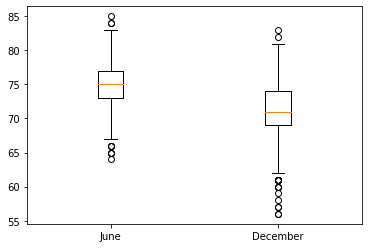

In [21]:
#check if there are outliers:
import matplotlib.pyplot as plt

box_data = [population1_june, population2_dec]
plt.boxplot(box_data,labels=['June', 'December']);

#There are outliers, so our original assumption was not met.
#Note: Assumption of no outliers is violated, results may not be trusted. 

In [22]:
# Check for normality
# a) can check histograms of each to see if normally distributed
# b) or Shapiro-Wilks Normality Test

# Shapiro-Wilks Normality Test. The Shapiro-Wilks test for normality is one of three general normality 
# tests designed to detect all departures from normality. 
# It is comparable in power to the other two tests. 

# The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05.

#p-value <0.05
stats.shapiro(population1_june)
#Thus,the test rejects the hypothesis of normality when the p-value is less than or equal to 0.05

ShapiroResult(statistic=0.983282744884491, pvalue=3.5219510684594835e-13)

In [23]:
# December Shapiro result
stats.shapiro(population2_dec)
#Thus,the test rejects the hypothesis of normality when the p-value is less than or equal to 0.05

ShapiroResult(statistic=0.9843476414680481, pvalue=9.044617485520767e-12)

### INTERPRETATION OF THE RESULTS

An unpaired sample t-test was used to analyze mean temperatures in June and then again in December to check for a significant difference between them. The average population temperature in June was higher (74.944118 degrees F) compared to the population average temperature in December (71.041529 degrees F); there was a significant difference in temperature (p-value = 3.9025129038616655e-191).

-Note: Assumption of normality violated according to Shapiro-Wilks Normality Test above, results should not be trusted. Data should perhaps be analyzed using Wilcoxon signed-rank Test.

-Note: Assumption of no outliers is violated as seen by the boxplot above, results should not be trusted. Removing outliers may perhaps remove data that should be there. More analysis would need to be done. 